# Data Exploring

- Weather Dataset for predicting Rain


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('/content/sample_data/weatherAUS.csv')
df.shape, df.head()

((108158, 23),
          Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
 1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
 2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
 3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
 4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
 
   WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
 0           W           44.0          W  ...        71.0         22.0   
 1         WNW           44.0        NNW  ...        44.0         25.0   
 2         WSW           46.0          W  ...        38.0         30.0   
 3          NE           24.0         SE  ...        45.0         16.0   
 4           W           41.0        ENE  ...        82.0         33.0   
 
    Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  R

In [22]:
#in the doc => rmv RISK_MM
df.columns
#df.drop(['RISK_MM'], axis=1, inplace=True) => the updated dataset removed it already*

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108158 entries, 0 to 108157
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           108158 non-null  object 
 1   Location       108158 non-null  object 
 2   MinTemp        106935 non-null  float64
 3   MaxTemp        107116 non-null  float64
 4   Rainfall       105566 non-null  float64
 5   Evaporation    62579 non-null   float64
 6   Sunshine       54985 non-null   float64
 7   WindGustDir    101542 non-null  object 
 8   WindGustSpeed  101567 non-null  float64
 9   WindDir9am     99606 non-null   object 
 10  WindDir3pm     105062 non-null  object 
 11  WindSpeed9am   106628 non-null  float64
 12  WindSpeed3pm   106010 non-null  float64
 13  Humidity9am    106036 non-null  float64
 14  Humidity3pm    105602 non-null  float64
 15  Pressure9am    97472 non-null   float64
 16  Pressure3pm    97513 non-null   float64
 17  Cloud9am       67488 non-null

### Categorical vars:

In [24]:
#finding categorical vars => dtype == O aka object
cat = [var for var in df.columns if df[var].dtype =='O']
print('There are {} categorical variables\n'.format(len(cat)))

print('The categorical variables are :', cat)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [25]:
df[cat].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Problems w Categorical vars:
1. missing values
2. Cardinality

#### 1. Missing val

In [26]:
df[cat].isnull().sum()

,0
Date,0
Location,0
WindGustDir,6616
WindDir9am,8552
WindDir3pm,3096
RainToday,2593
RainTomorrow,2594


In [27]:
cat1 = [var for var in cat if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

WindGustDir     6616
WindDir9am      8552
WindDir3pm      3096
RainToday       2593
RainTomorrow    2594
dtype: int64


In [28]:
#frequency of cat values
for var in cat:
    print(df[var].value_counts())

Date
2016-05-08    36
2016-05-07    36
2016-05-06    36
2016-05-05    36
2016-05-04    36
              ..
2007-12-26     1
2008-01-28     1
2008-01-29     1
2008-01-30     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Melbourne           3193
Brisbane            3193
Adelaide            3193
MountGambier        3040
Townsville          3040
Albury              3040
GoldCoast           3040
MountGinini         3040
Wollongong          3040
Ballarat            3040
Bendigo             3040
Cairns              3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
CoffsHarbour        3009
BadgerysCreek       3009
Cobar               3009
Mildura             3009
Williamtown         3009
SydneyAirport       3009
WaggaWagga          3009
Richmond            3009
NorfolkIsland       3009
Moree               3009
Sale                3009
Nuriootpa           3009
Dartmoor            3009
Watsonia 

In [29]:
# distru of cat values
for var in cat:
    print(df[var].value_counts()/float(len(df)))
    #in the notebook he used np.float() => ain't in numpy anymore, use float() by itself

Date
2016-05-08    0.000333
2016-05-07    0.000333
2016-05-06    0.000333
2016-05-05    0.000333
2016-05-04    0.000333
                ...   
2007-12-26    0.000009
2008-01-28    0.000009
2008-01-29    0.000009
2008-01-30    0.000009
2008-01-31    0.000009
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.031768
Sydney              0.030918
Melbourne           0.029522
Brisbane            0.029522
Adelaide            0.029522
MountGambier        0.028107
Townsville          0.028107
Albury              0.028107
GoldCoast           0.028107
MountGinini         0.028107
Wollongong          0.028107
Ballarat            0.028107
Bendigo             0.028107
Cairns              0.028107
Penrith             0.028098
Tuggeranong         0.028098
Newcastle           0.028098
CoffsHarbour        0.027820
BadgerysCreek       0.027820
Cobar               0.027820
Mildura             0.027820
Williamtown         0.027820
SydneyAirport       0.027820
WaggaWagga          0.02

In [30]:
for var in cat:
    print(var, 'contains', len(df[var].unique()), 'labels')

Date contains 3436 labels
Location contains 36 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 3 labels


#### 2. Cardinality

##### 1. Date cardinality

In [31]:
print(df['Date'].dtype)
# parse obj => datetime string
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

object


In [32]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108158 entries, 0 to 108157
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           108158 non-null  datetime64[ns]
 1   Location       108158 non-null  object        
 2   MinTemp        106935 non-null  float64       
 3   MaxTemp        107116 non-null  float64       
 4   Rainfall       105566 non-null  float64       
 5   Evaporation    62579 non-null   float64       
 6   Sunshine       54985 non-null   float64       
 7   WindGustDir    101542 non-null  object        
 8   WindGustSpeed  101567 non-null  float64       
 9   WindDir9am     99606 non-null   object        
 10  WindDir3pm     105062 non-null  object        
 11  WindSpeed9am   106628 non-null  float64       
 12  WindSpeed3pm   106010 non-null  float64       
 13  Humidity9am    106036 non-null  float64       
 14  Humidity3pm    105602 non-null  float64       
 15  

In [34]:
df.drop('Date', axis=1, inplace=True)

In [35]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [36]:
#again, explore cat vars
cat = [var for var in df.columns if df[var].dtype =='O']
print('There are {} categorical variables\n'.format(len(cat)))

print('The categorical variables are :', cat)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [37]:
#rechecking missing values
df[cat].isnull().sum()

,0
Location,0
WindGustDir,6616
WindDir9am,8552
WindDir3pm,3096
RainToday,2593
RainTomorrow,2594


##### 2. Location missing values

In [38]:
#explore each missing values cat
#1. location
print('location contains', len(df.Location.unique()), 'labels')
df.Location.unique()

location contains 36 labels


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera'], dtype=object)

In [39]:
#freq distru
df.Location.value_counts()

,count
Location,
Canberra,3436
Sydney,3344
Melbourne,3193
Brisbane,3193
Adelaide,3193
MountGambier,3040
Townsville,3040
Albury,3040
GoldCoast,3040


In [40]:
# doing one hot encoding of location!
#setting k-1 dummy vars after 1 hot
location_dummies = pd.get_dummies(df.Location, drop_first=True).astype(int)
location_dummies.head()
#wo using astype => it out boolean values not binary!

,Albury,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,...,Sale,Sydney,SydneyAirport,Townsville,Tuggeranong,WaggaWagga,Watsonia,Williamtown,Wollongong,Woomera
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### 3. WindGustDir Cardinality

In [41]:
print('windgustdir contains', len(df['WindGustDir'].unique()), 'labels')

windgustdir contains 17 labels


In [42]:
df['WindGustDir'].unique()
df.WindGustDir.value_counts()

,count
WindGustDir,
W,8403
N,7532
S,7497
WSW,7091
SSE,7088
SE,6972
SW,6536
SSW,6386
WNW,6345


In [43]:
#again, one hot encoding.
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).astype(int).head()
#added dummy_na => represent the missing vals

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
#sum all 1s for each variable => observation/cat
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)
#10326 missing vals!

,0
ENE,6307
ESE,4875
N,7532
NE,5924
NNE,5571
NNW,3919
NW,5211
S,7497
SE,6972
SSE,7088


##### 4. WindDir9am => missing vals

In [45]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'label')

WindDir9am contains 17 label


In [46]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [47]:
print(df['WindDir9am'].value_counts())

WindDir9am
N      9111
SSE    7295
SW     7171
W      7044
S      6898
SE     6442
NW     6325
NNE    6180
SSW    6172
WNW    5932
WSW    5823
NE     5496
E      5269
ENE    4923
NNW    4893
ESE    4632
Name: count, dtype: int64


In [48]:
#1hot encode
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).astype(int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
#sum observa
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

,0
ENE,4923
ESE,4632
N,9111
NE,5496
NNE,6180
NNW,4893
NW,6325
S,6898
SE,6442
SSE,7295


##### 5. WindDir3pm => missing vals

In [50]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'label')

WindDir3pm contains 17 label


In [51]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [52]:
print(df['WindDir3pm'].value_counts())

WindDir3pm
S      7851
W      7838
SE     7761
NE     7269
N      7177
WSW    6955
SSE    6748
ENE    6489
WNW    6473
SW     6432
E      6149
SSW    5948
NW     5748
ESE    5652
NNE    5586
NNW    4986
Name: count, dtype: int64


In [53]:
#1hot encode
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).astype(int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [54]:
#sum observa
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

,0
ENE,6489
ESE,5652
N,7177
NE,7269
NNE,5586
NNW,4986
NW,5748
S,7851
SE,7761
SSE,6748


##### 6. RainToday => missing vals

In [55]:
print('RainToday contains', len(df['RainToday'].unique()), 'label')

RainToday contains 3 label


In [56]:
df['RainToday'].unique(), df['RainToday'].value_counts()

(array(['No', 'Yes', nan], dtype=object),
 RainToday
 No     81579
 Yes    23986
 Name: count, dtype: int64)

In [57]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).astype(int).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [58]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

,0
Yes,23986
NaN,2593


### Explore Numeric vals

In [59]:
numr = [var for var in df.columns if df[var].dtype!='O']
print("there are {} numeric values\n".format(len(numr)))
print("the numerical vars are:", numr)

there are 19 numeric values

the numerical vars are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [60]:
df[numr].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Problems with numerical vars
1. Missing values.

#### 1. Missing vals

In [61]:
df[numr].isnull().sum()

,0
MinTemp,1223
MaxTemp,1042
Rainfall,2592
Evaporation,45579
Sunshine,53173
WindGustSpeed,6591
WindSpeed9am,1530
WindSpeed3pm,2148
Humidity9am,2122
Humidity3pm,2556


#### 2. Outliers in numerical variables

In [62]:
# summary statistics
print(round(df[numr].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  106935.0  107116.0  105566.0      62579.0   54985.0       101567.0   
mean       12.0      23.0       2.0          5.0       7.0           40.0   
std         6.0       7.0       9.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            7.0   
25%         7.0      18.0       0.0          3.0       4.0           30.0   
50%        12.0      22.0       0.0          5.0       8.0           37.0   
75%        17.0      28.0       1.0          7.0      10.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      106628.0      106010.0     106036.0     105602.0      97472.0   
mean           14.0          19.0         70.0         53.0       1018.0   
std             9.0           9.0         18.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed9am')

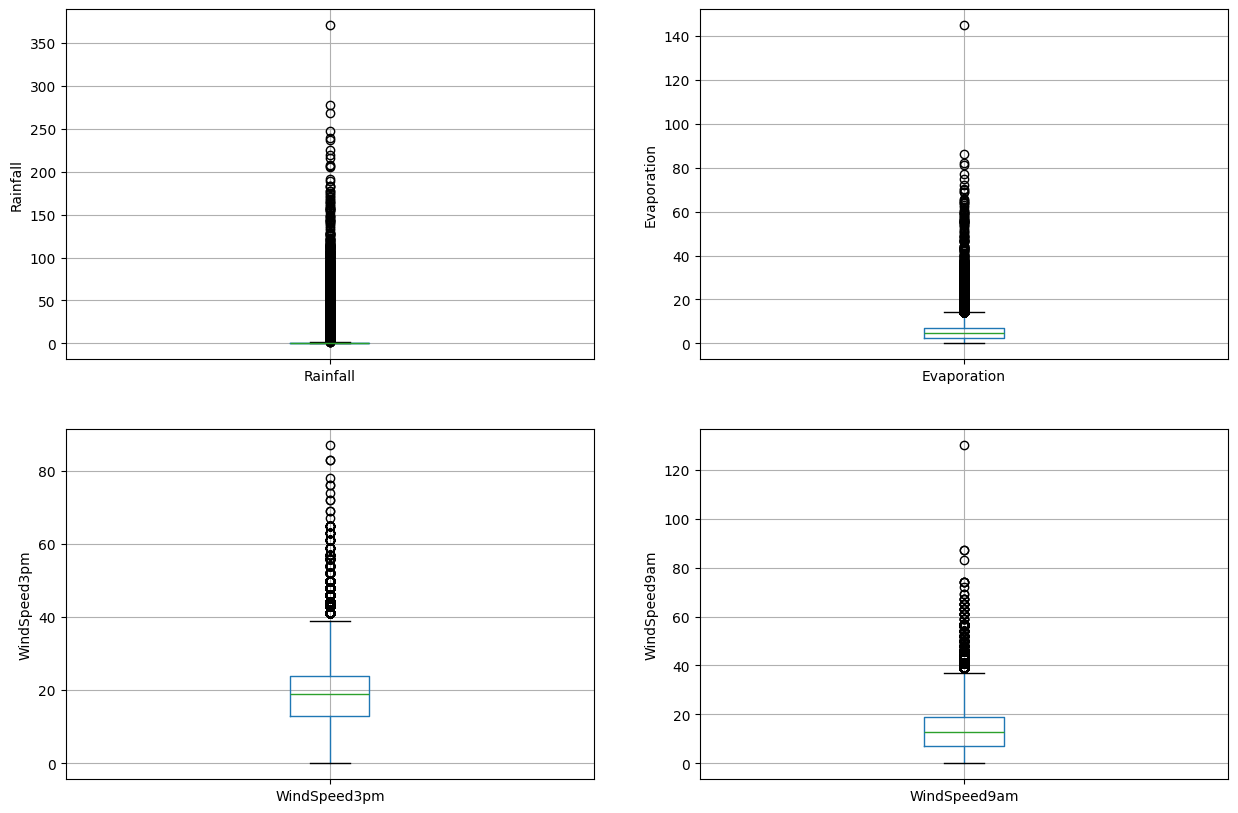

In [63]:
#draw boxplot
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2,2,3)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')



#### 3. Distribution of vars
- skewed => IQR
- normal => extreme value analysis

Text(0, 0.5, 'RainTomorrow')

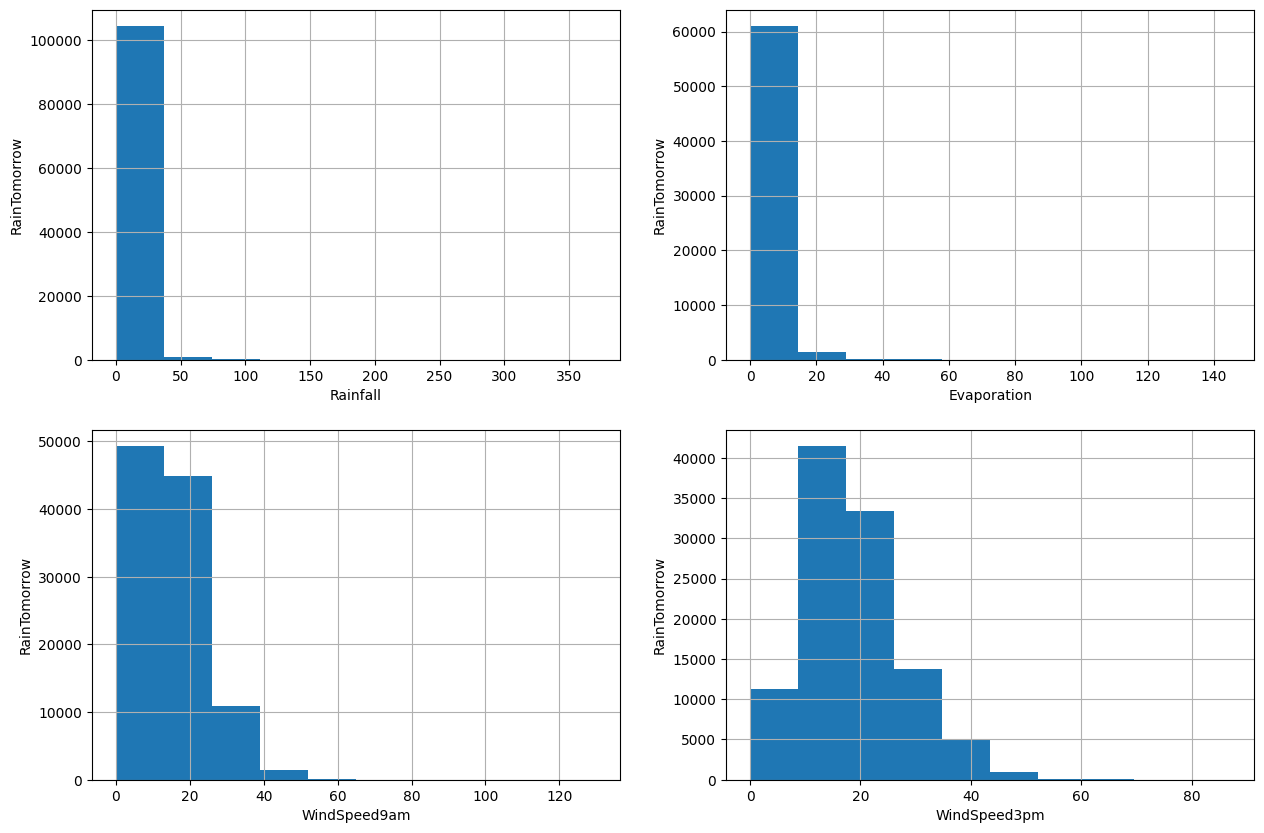

In [64]:
# plot histogram to check values:

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig= df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel("RainTomorrow")

plt.subplot(2,2,2)
fig= df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel("RainTomorrow")

plt.subplot(2,2,3)
fig= df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel("RainTomorrow")

plt.subplot(2,2,4)
fig= df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel("RainTomorrow")

In [65]:
#finding outliers through IQR
# 1. Rainfall
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
lower_fence = df.Rainfall.quantile(0.25) - (IQR *3)
upper_fence = df.Rainfall.quantile(0.75) + (IQR *3)
print('rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

# 1. Evaporation
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
lower_fence = df.Evaporation.quantile(0.25) - (IQR *3)
upper_fence = df.Evaporation.quantile(0.75) + (IQR *3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

# 1. WindSpeed9am
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR *3)
upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR *3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

# 1. WindSpeed3pm
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR *3)
upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR *3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.2 or > 21.0
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


### feature vec & splits

In [66]:
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### feature eng


In [68]:
cat = [col for col in x_train.columns if x_train[col].dtype == 'object']
numr = [col for col in x_train.columns if x_train[col].dtype != 'object']
cat, numr

(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'Year',
  'Month',
  'Day'])

In [69]:
#1. missing vals in numeric
print("train missing vals:\n\n", x_train[numr].isnull().sum())
print("\n\ntest missing vals:\n\n", x_test[numr].isnull().sum())

train missing vals:

 MinTemp            997
MaxTemp            844
Rainfall          2104
Evaporation      36450
Sunshine         42542
WindGustSpeed     5266
WindSpeed9am      1222
WindSpeed3pm      1747
Humidity9am       1703
Humidity3pm       2067
Pressure9am       8599
Pressure3pm       8568
Cloud9am         32595
Cloud3pm         34141
Temp9am           1286
Temp3pm           1686
Year                 0
Month                0
Day                  0
dtype: int64


test missing vals:

 MinTemp            226
MaxTemp            198
Rainfall           488
Evaporation       9129
Sunshine         10631
WindGustSpeed     1325
WindSpeed9am       308
WindSpeed3pm       401
Humidity9am        419
Humidity3pm        489
Pressure9am       2087
Pressure3pm       2077
Cloud9am          8075
Cloud3pm          8389
Temp9am            293
Temp3pm            376
Year                 0
Month                0
Day                  0
dtype: int64


In [70]:
#impute missing vals using median cuz it works with outliers
for df1 in [x_train, x_test]:
    for col in numr:
        col_median = x_train[col].median()
        df1[col].fillna(col_median, inplace=True)

print("train missing vals:\n\n", x_train[numr].isnull().sum())
print("\n\ntest missing vals:\n\n", x_test[numr].isnull().sum())

train missing vals:

 MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64


test missing vals:

 MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64


In [71]:
#2. missing vals in categor
print("train missing vals:\n\n", x_train[cat].isnull().mean())
print("\n\ntest missing vals:\n\n", x_test[cat].isnull().mean())

train missing vals:

 Location       0.000000
WindGustDir    0.061068
WindDir9am     0.079098
WindDir3pm     0.028928
RainToday      0.024328
dtype: float64


test missing vals:

 Location       0.000000
WindGustDir    0.061575
WindDir9am     0.078957
WindDir3pm     0.027413
RainToday      0.022559
dtype: float64


In [72]:
#impute data
for df2 in [x_train, x_test]:
    df2['WindGustDir'].fillna(x_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(x_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(x_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(x_train['RainToday'].mode()[0], inplace=True)

In [73]:
print("train missing vals:\n\n", x_train[cat].isnull().sum())
print("\n\ntest missing vals:\n\n", x_test[cat].isnull().sum())

train missing vals:

 Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


test missing vals:

 Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64
